UJIAN AKHIR SEMESTER
Fayza Noval Fausta
NIM G.231.22.0102

1. SUPERVISED LEARNING
Metode : Logistic Regression

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.89      1.00      0.94        17

    accuracy                           0.90        20
   macro avg       0.95      0.67      0.72        20
weighted avg       0.91      0.90      0.88        20

[[ 1  2]
 [ 0 17]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


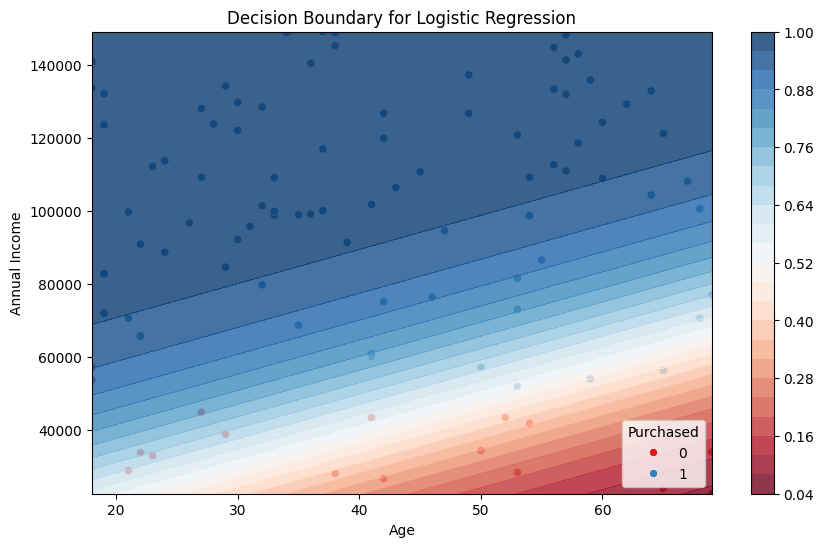

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Dataset
np.random.seed(0)
n_samples = 100
age = np.random.randint(18, 70, size=n_samples)
income = np.random.randint(20000, 150000, size=n_samples)
purchased = (0.3 * age + 0.7 * income / 1000 + np.random.randn(n_samples) > 50).astype(int)

data = pd.DataFrame({
    'Age': age,
    'Annual Income': income,
    'Purchased': purchased
})

# Memisahkan fitur dan label
X = data[['Age', 'Annual Income']]
y = data['Purchased']

# Membagi dataset menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat model logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Memprediksi hasil untuk test set
y_pred = model.predict(X_test)

# Menampilkan hasil evaluasi
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualisasi data dan decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual Income', hue='Purchased', data=data, palette='Set1')

# Mengambil koefisien dan intercept dari model
coef = model.coef_[0]
intercept = model.intercept_

# Membuat grid untuk age dan income
age_range = np.linspace(data['Age'].min(), data['Age'].max(), 100)
income_range = np.linspace(data['Annual Income'].min(), data['Annual Income'].max(), 100)
xx, yy = np.meshgrid(age_range, income_range)
grid = np.c_[xx.ravel(), yy.ravel()]

# Menghitung probabilitas untuk grid
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot decision boundary
contour = plt.contourf(xx, yy, probs, 25, cmap="RdBu", alpha=0.8)
plt.colorbar(contour)
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Decision Boundary for Logistic Regression')
plt.show()

2. Unsupervised Learning
Metode : Hierarchical Clustering

Dataset:
     Animal  Size  Weight  Lifespan
0  Elephant   300    6000        70
1     Tiger   200     300        15
2      Lion   190     250        14
3     Horse   160     450        30
4     Zebra   150     350        25
5      Deer    90      80        20
6    Monkey    40      50        35
7  Kangaroo    85      90        20
8     Panda   100     100        20
9    Rabbit     5       2         9


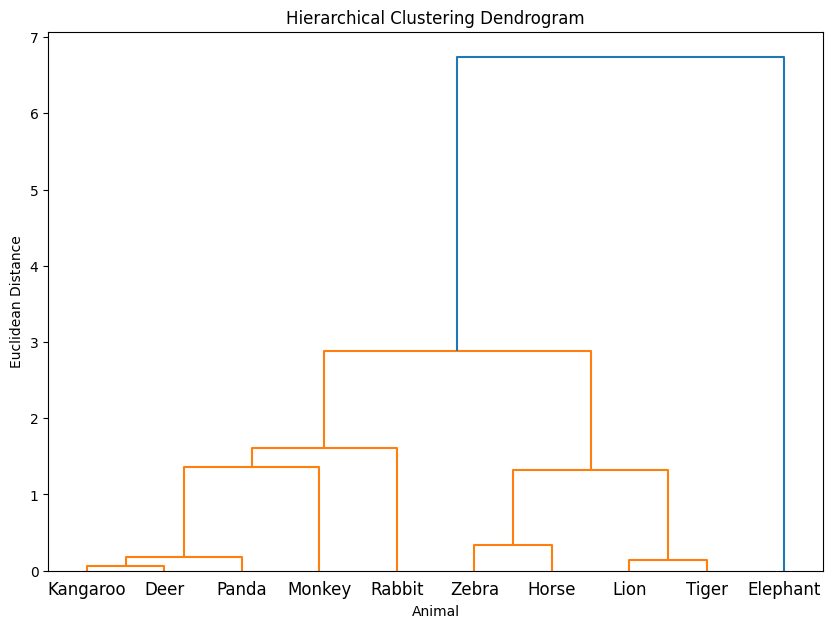

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


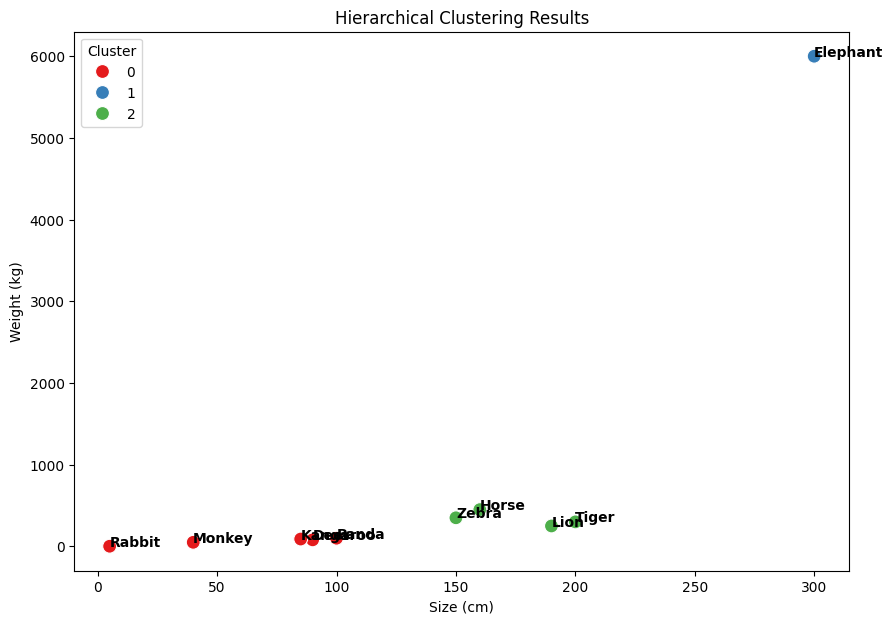

In [3]:
# Import libraries yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Dataset
data = {
    'Animal': ['Elephant', 'Tiger', 'Lion', 'Horse', 'Zebra', 'Deer', 'Monkey', 'Kangaroo', 'Panda', 'Rabbit'],
    'Size': [300, 200, 190, 160, 150, 90, 40, 85, 100, 5],  # ukuran dalam cm
    'Weight': [6000, 300, 250, 450, 350, 80, 50, 90, 100, 2],  # berat dalam kg
    'Lifespan': [70, 15, 14, 30, 25, 20, 35, 20, 20, 9]  # umur rata-rata dalam tahun
}

df = pd.DataFrame(data)

# Menampilkan dataset
print("Dataset:")
print(df)

# Mengambil fitur untuk clustering
X = df[['Size', 'Weight', 'Lifespan']]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Melakukan hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Membuat dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=df['Animal'].values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Animal')
plt.ylabel('Euclidean Distance')
plt.show()

# Menampilkan hasil cluster dalam bentuk scatter plot
from sklearn.cluster import AgglomerativeClustering

# Membuat model hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['Cluster'] = cluster.fit_predict(X_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Size', y='Weight', hue='Cluster', data=df, palette='Set1', s=100)
for i in range(df.shape[0]):
    plt.text(df['Size'][i], df['Weight'][i], df['Animal'][i], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Size (cm)')
plt.ylabel('Weight (kg)')
plt.show()
